In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('titanic_toy.csv')
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [37]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [38]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [41]:
x_test.isnull().mean()*100

Age       20.670391
Fare       5.027933
Family     0.000000
dtype: float64

In [42]:
# mean and medain
mean_age = x_train['Age'].mean()
mean_fare = x_train['Fare'].mean()

median_age = x_train['Age'].median()
median_fare = x_train['Fare'].median()

In [43]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_age'] = x_train['Age'].fillna(median_age)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)



In [55]:
# check the variance
print('variance of orignal age:' , x_train['Age'].var())
print('variance of mean_age:' , x_train['mean_age'].var())
print('variance of median_age:' , x_train['median_age'].var())

print('\n\nvariance of original fare:' , x_train['Fare'].var())
print('variance of mean_fare:' , x_train['mean_fare'].var())
print('variance of median_fare:' , x_train['median_fare'].var())


variance of orignal age: 210.2517072477438
variance of mean_age: 168.8519336687225
variance of median_age: 169.20731007048096


variance of original fare: 2761.031434948639
variance of mean_fare: 2621.2323749512393
variance of median_fare: 2637.01248167777


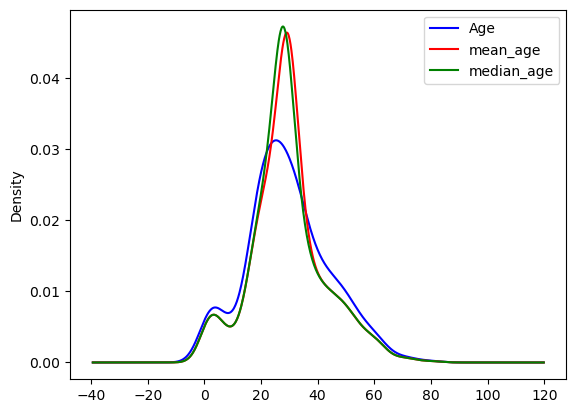

In [48]:
# show the graph of distribution of age 
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde', color='blue', ax=ax)
x_train['mean_age'].plot(kind='kde', color='red', ax=ax)
x_train['median_age'].plot(kind='kde', color='green', ax=ax)

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

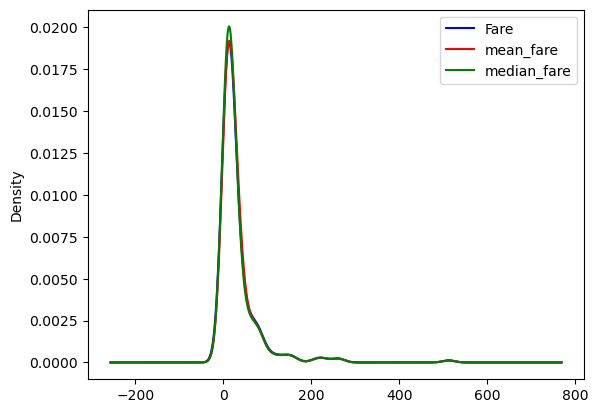

In [53]:
# fare distribtion 
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Fare'].plot(kind='kde', color='blue', ax=ax)
x_train['mean_fare'].plot(kind='kde', color='red', ax=ax)
x_train['median_fare'].plot(kind='kde', color='green', ax=ax)

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [54]:
# covariance 
x_train.cov()

,Age,Fare,Family,mean_age,mean_fare,median_age,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,71.193767,210.251707,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,2761.031435,63.938058,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,17.657433,-5.587710,17.672035
mean_age,210.251707,60.224654,-5.616299,168.851934,57.175304,168.851934,56.282518
mean_fare,71.193767,2761.031435,17.657433,57.175304,2621.232375,60.700688,2621.232375
median_age,210.251707,63.938058,-5.587710,168.851934,60.700688,169.207310,59.728510
median_fare,70.082085,2761.031435,17.672035,56.282518,2621.232375,59.728510,2637.012482


<Axes: >

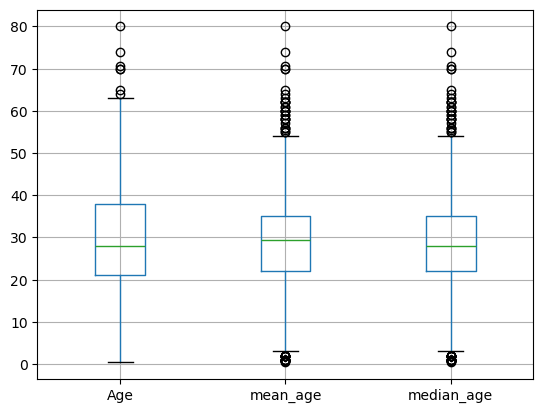

In [60]:
# outlier detect after mean medain imputation using box plot

fig = plt.figure()
ax = fig.add_subplot(111)

x_train[['Age', 'mean_age','median_age']].boxplot()

<Axes: >

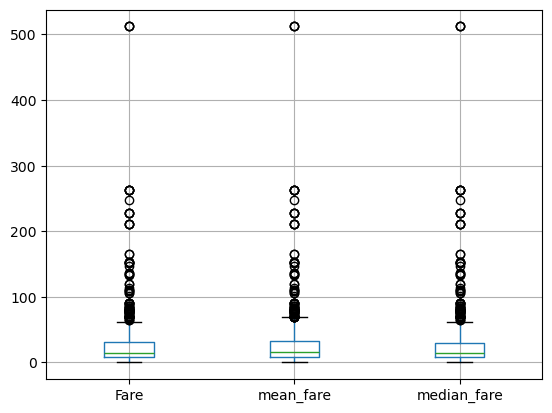

In [61]:
# box of Fare
x_train[['Fare', 'mean_fare','median_fare']].boxplot()

## using sklearn to perform the imputation (mean mendain)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [66]:
from sklearn.compose import ColumnTransformer 

trf = ColumnTransformer(
    [
        ('imputer1', imputer1, ['Age']),
        ('imputer2', imputer2, ['Fare'])
    ], remainder='passthrough'
)

In [67]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [69]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [71]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [78]:
X_train.isnull().sum()
t = trf.transform(X_train)
trf.transform(X_test)

t = pd.DataFrame(t, columns=X_train.columns)
t.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64